## Covid-19 Data Analysis of all over the world

This notebook is all about the Data Analysis of Covid-19. Data has been taken from <a href="https://www.worldometers.info/coronavirus/">Worldometers</a> webiste

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
print("Setup Completed")

Setup Completed


## Get data from website

In [2]:
# Send a get request to the website
url ="https://www.worldometers.info/coronavirus/"
response = requests.get(url)

In [3]:
# Parse the HTML content using beauBeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
# Find the table element
table = soup.find('table', id ='main_table_countries_today')

In [5]:
# Extract the table data
rows = table.find_all('tr')

# Extract the header row and use it as column names
header = rows[0].find_all('th')
header = [h.text.strip() for h in header]
data = []

# Loop over the data rows and extract the cell values
for row in rows[1:247]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Create the DataFrame with the header and data
df = pd.DataFrame(data, columns=header)

df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"125,509,988",,"1,620,332",,"120,994,476","+1,341","2,895,180","7,302",...,,,,North America,,,,,,
1,,Asia,"215,069,101","+10,434","1,539,896",+11,"199,636,189","+4,246","13,893,016","15,549",...,,,,Asia,,,,,,
2,,Europe,"247,480,378",,"2,026,983",,"243,097,385","+20,392","2,356,010","6,451",...,,,,Europe,,,,,,
3,,South America,"68,250,502",,"1,352,055",,"66,376,668",,"521,779","10,174",...,,,,South America,,,,,,
4,,Oceania,"13,966,366","+3,372","26,570",+10,"13,811,745","+3,177","128,051",63,...,,,,Australia/Oceania,,,,,,


In [6]:
df.shape

(246, 22)

In [7]:
df.tail()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
241,,Total:,"247,480,378",,"2,026,983",,"243,097,385",,"2,356,010","6,451",...,,,,Europe,,,,,,
242,,Total:,"68,250,502",,"1,352,055",,"66,376,668",,"521,779","10,174",...,,,,South America,,,,,,
243,,Total:,"13,966,366","+3,372","26,570",+10,"13,811,745","+3,177","128,051",63,...,,,,Australia/Oceania,,,,,,
244,,Total:,"12,807,649",,"258,645",,"12,079,974",,"469,030",548,...,,,,Africa,,,,,,
245,,Total:,721,,15,,706,,0,0,...,,,,,,,,,,


### Data Cleaning Process

In [8]:
#Rename column name as per need
df =df.rename(columns={'Country,Other':'Country'})

In [9]:
#Removing unwanted rows from the DataFrame
df =df.drop(index=range(8))

In [10]:
df = df.drop(index=range(239,246))

In [11]:
df.shape

(231, 22)

In [12]:
df.columns #Display all the available columns

Index(['#', 'Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop',
       'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [13]:
# drop unwanted columns as per need
df =df.drop(df.columns[15:], axis=1)

In [14]:
df.shape

(231, 15)

In [15]:
df.head()

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
8,1,USA,"106,082,759",,"1,153,526",,"103,746,998",,"1,182,235","2,136","316,849","3,445","1,171,933,667","3,500,344","334,805,269"
9,2,India,"44,700,667",,"530,818",,"44,161,922",,"7,927",N/A,"31,779",377,"920,637,763","654,498","1,406,631,776"
10,3,France,"39,735,279",,"165,454",,"39,468,692",,"101,133",869,"605,864","2,523","271,490,188","4,139,547","65,584,518"
11,4,Germany,"38,326,616",,"170,231",,"38,012,000","+13,500","144,385",N/A,"456,902","2,029","122,332,384","1,458,359","83,883,596"
12,5,Brazil,"37,204,677",,"699,917",,"36,249,161",,"255,599",N/A,"172,761","3,250","63,776,166","296,146","215,353,593"


In [16]:
df.describe()

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
count,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
unique,231,231,231,5,211,3,212,9,185,68,229,215,213,214,230
top,1,USA,"106,082,759",,,,N/A,,N/A,,,,,,
freq,1,1,1,227,6,228,19,205,19,93,2,8,18,18,2


In [17]:
#i am Removing two more columns which are not useful for me.
cols_to_remove=['NewCases','NewRecovered'] #creating a list of columns which needs to be removed
df =df.drop(cols_to_remove, axis=1)

In [18]:
#Replacing empty rows in columns with NaN
df['NewDeaths'] = df['NewDeaths'].replace('',np.nan) 
df['Serious,Critical'] = df['Serious,Critical'].replace('',np.nan)

In [19]:
df.head()

,#,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
8,1,USA,"106,082,759","1,153,526",NaN,"103,746,998","1,182,235","2,136","316,849","3,445","1,171,933,667","3,500,344","334,805,269"
9,2,India,"44,700,667","530,818",NaN,"44,161,922","7,927",N/A,"31,779",377,"920,637,763","654,498","1,406,631,776"
10,3,France,"39,735,279","165,454",NaN,"39,468,692","101,133",869,"605,864","2,523","271,490,188","4,139,547","65,584,518"
11,4,Germany,"38,326,616","170,231",NaN,"38,012,000","144,385",N/A,"456,902","2,029","122,332,384","1,458,359","83,883,596"
12,5,Brazil,"37,204,677","699,917",NaN,"36,249,161","255,599",N/A,"172,761","3,250","63,776,166","296,146","215,353,593"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 8 to 238
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 231 non-null    object
 1   Country           231 non-null    object
 2   TotalCases        231 non-null    object
 3   TotalDeaths       231 non-null    object
 4   NewDeaths         3 non-null      object
 5   TotalRecovered    231 non-null    object
 6   ActiveCases       231 non-null    object
 7   Serious,Critical  138 non-null    object
 8   Tot Cases/1M pop  231 non-null    object
 9   Deaths/1M pop     231 non-null    object
 10  TotalTests        231 non-null    object
 11  Tests/
1M pop     231 non-null    object
 12  Population        231 non-null    object
dtypes: object(13)
memory usage: 23.6+ KB


In [21]:
df['TotalCases'].dtype

dtype('O')

In [22]:
# firstly removing the commas(,) from 'TotalCases' column
df["TotalCases"] = df["TotalCases"].str.replace(",","")

# lets' change the dtype of TotalCases columns to int
df['TotalCases']= pd.to_numeric(df['TotalCases'])

In [23]:
df['TotalCases'].dtype

dtype('int64')

Now data cleaning process is done. Let's plot some visualization

## Data Visualization

### Top 10 Countries by Highest Number of Covid-19 Cases

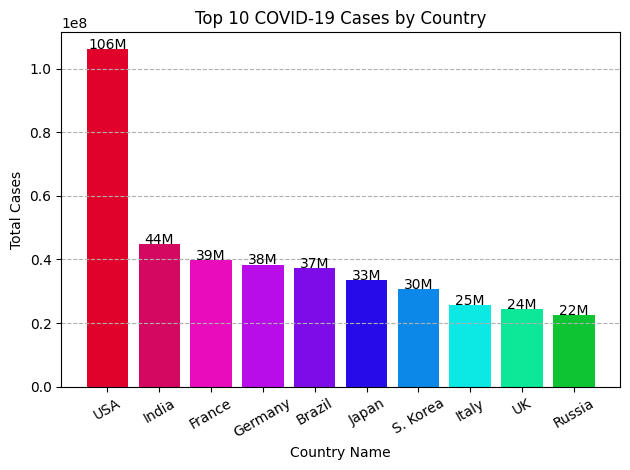

In [24]:
#let's plot a bar chart for top 10 countries with most number of cases.
fig, ax = plt.subplots()

clr=['#E0022B','#D40861','#E80CBC','#B80CE8','#7E0CE8','#250CE8','#0C89E8','#0CE8E4','#0CE897','#0EC432'] #for different color bar
plt.bar(df['Country'].head(10), df['TotalCases'].head(10),color=clr)
plt.grid(axis='y', linestyle='--')

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Total Cases')
plt.title('Top 10 COVID-19 Cases by Country')
plt.xticks(df['Country'].head(10),rotation=30)
plt.tight_layout()

#Adding text on each bar
for i, j in enumerate(df['TotalCases'].head(10)):
    ax.text(i,j+100000, str(j//1000000)+'M', ha='center')

plt.show()

### Total cases, deaths and recovery rate by Country

In [25]:
#let's replace comma between the values
df['TotalDeaths']=df['TotalDeaths'].str.replace(',','')
df['TotalRecovered']=df['TotalRecovered'].str.replace(',','')

In [26]:
df['TotalRecovered']= pd.to_numeric(df['TotalRecovered'].head(10)) #changing data type from Object type
df['TotalDeaths']= pd.to_numeric(df['TotalDeaths'])

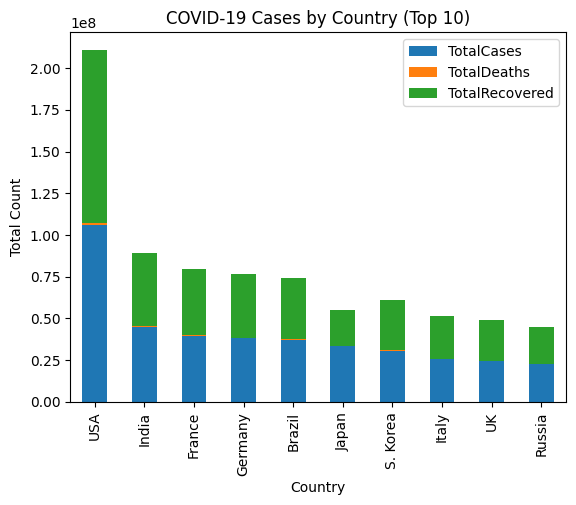

In [27]:
cols=['Country','TotalCases', 'TotalDeaths', 'TotalRecovered']
df_select=df[cols]

df_top10 = df_select.nlargest(10,'TotalCases')

df_top10.set_index('Country', inplace=True)

ax= df_top10.plot(kind='bar', stacked = True)

plt.title('COVID-19 Cases by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Count')
plt.show()

## Top Countries with Active Number of Cases

In [28]:
df['ActiveCases'].dtype

dtype('O')

In [29]:
# replacing comma and changing data type
df['ActiveCases']=df['ActiveCases'].str.replace(',','')

df['ActiveCases']= pd.to_numeric(df['ActiveCases'].head(10))

In [30]:
df['ActiveCases'].dtype

dtype('float64')

In [31]:
df= df.sort_values('ActiveCases', ascending=False) #sorting Active Cases values from greater to smaller

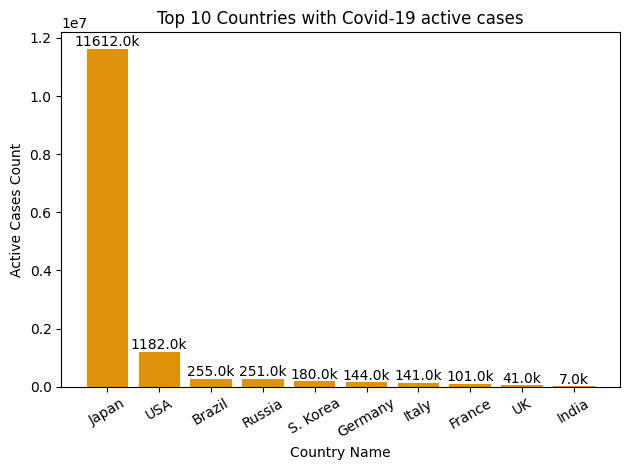

In [32]:
#let's plot a bar chart for top 10 countries with most number of cases.
fig, ax = plt.subplots()

plt.bar(df['Country'].head(10), df['ActiveCases'].head(10),color='#E0920B')

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Active Cases Count')
plt.title('Top 10 Countries with Covid-19 active cases')
plt.xticks(df['Country'].head(10), rotation=30)
plt.tight_layout()

#Adding text on each bar
for i, j in enumerate(df['ActiveCases'].head(10)):
    ax.text(i,j+100000, str(j//1000)+'k', ha='center')
    
plt.show()

### Covid-19 Deaths per Million Population

In [33]:
df['Deaths/1M pop'] =df['Deaths/1M pop'].str.replace(',','') #replacing commas

In [34]:
df.head()

,#,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
13,6,Japan,33398536,73632.0,NaN,21712446.0,11612458.0,73,"265,944",586,"97,046,868","772,759","125,584,838"
8,1,USA,106082759,1153526.0,NaN,103746998.0,1182235.0,"2,136","316,849",3445,"1,171,933,667","3,500,344","334,805,269"
12,5,Brazil,37204677,699917.0,NaN,36249161.0,255599.0,N/A,"172,761",3250,"63,776,166","296,146","215,353,593"
17,10,Russia,22550395,396974.0,NaN,21902407.0,251014.0,N/A,"154,660",2723,"273,400,000","1,875,095","145,805,947"
14,7,S. Korea,30749740,34211.0,+10,30535014.0,180515.0,144,"599,061",666,"15,804,065","307,892","51,329,899"


In [35]:
df['Deaths/1M pop'] = pd.to_numeric(df['Deaths/1M pop']) #converting data type from object type

In [36]:
df['Deaths/1M pop'].dtype

dtype('float64')

In [37]:
df=df.sort_values('Deaths/1M pop',ascending=False) #sorting the values

In [38]:
df.head()

,#,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population
42,35,Peru,4490491,219694.0,NaN,NaN,NaN,34,"133,311",6522.0,"38,246,538","1,135,444","33,684,208"
66,59,Bulgaria,1299057,38244.0,NaN,NaN,NaN,25,"189,793",5587.0,"11,107,008","1,622,741","6,844,597"
54,47,Hungary,2198461,48791.0,NaN,NaN,NaN,13,"228,857",5079.0,"11,394,556","1,186,160","9,606,259"
103,96,Bosnia and Herzegovina,401973,16296.0,NaN,NaN,NaN,NaN,"123,710",5015.0,"1,884,721","580,036","3,249,317"
105,98,North Macedonia,347327,9665.0,NaN,NaN,NaN,NaN,"166,880",4644.0,"2,226,216","1,069,626","2,081,304"


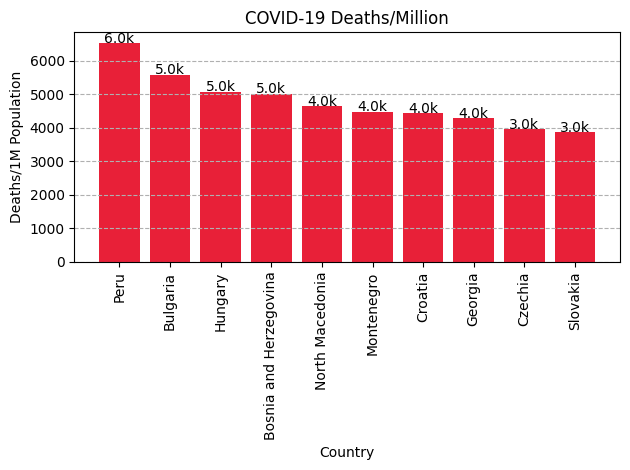

In [39]:
#let's plot a graph

fig, ax = plt.subplots()

plt.bar(df['Country'].head(10), df['Deaths/1M pop'].head(10),color='#E82038')
plt.grid(axis='y', linestyle='--')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Deaths/1M Population')
plt.title('COVID-19 Deaths/Million')
plt.xticks(df['Country'].head(10),rotation=90)
plt.tight_layout()

#Adding text on each bar
for i, j in enumerate(df['Deaths/1M pop'].head(10)):
    ax.text(i,j+10, str(j//1000)+'k', ha='center')

plt.show()

### Total Covid-19 tests by Country

In [40]:
df['TotalTests'] = df['TotalTests'].str.replace(',','') #removing commas
df['TotalTests'] = pd.to_numeric(df['TotalTests']) #changing data type
df=df.sort_values('TotalTests', ascending=False) #sorting

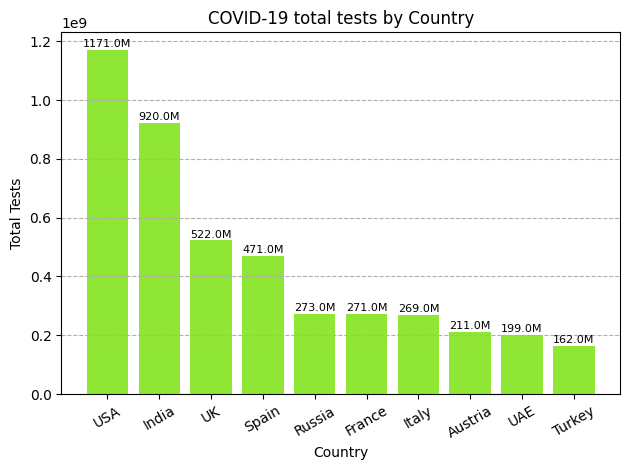

In [41]:
#let's plot a graph

fig, ax = plt.subplots()
plt.bar(df['Country'].head(10), df['TotalTests'].head(10),color='#90E635')
plt.grid(axis='y', linestyle='--')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Total Tests')
plt.title('COVID-19 total tests by Country')
plt.xticks(df['Country'].head(10),rotation=30)
plt.tight_layout()

#Adding text on each bar
for i, j in enumerate(df['TotalTests'].head(10)):
    ax.text(i,j+10000000, str(j//1000000)+'M', ha='center',fontsize=8)

plt.show()

This is the basic data cleaning and data visualization process which i have performed.

### Conclusion

Covid-19 Impact
- We can see in above analysis, USA has reported the highest number of cases followed by India, France and Germany and so on.
- USA has reported the most deaths followed by Brazil, India and so on.
- Japan has highest number of Active covid-19 cases followed by USA, Brazil, Russia and so on.
- Peru has more deaths per Million population followed by Bulgaria, Hungary and so on.
- USA has done highest tests followed by India, UK, Spain and so on.

Note:- This information is as of 23rd March 2023. It may be vary later.